# 逻辑回归



上一篇文章介绍了线性回归、岭回归、lasso回归和多项式回归模型。这些模型都是广义线性回归模型的具体形式，广义线性回归是一种灵活的框架，比普通线性回归要求更少的假设。这一章，我们讨论广义线性回归模型的具体形式的另一种形式，逻辑回归（logistic regression）。

逻辑回归模型在工业界是工程师用的非常多的模型了，比如在CTR预测等项目中被大量使用，之所以用的非常普遍，是因为逻辑回归拥有简单、解释性好、计算速度快等优点。

和前面讨论的模型不同，逻辑回归是用来做分类任务的。分类任务的目标是找一个函数，把观测值匹配到相关的类和标签上。学习算法必须用成对的特征向量和对应的标签来估计匹配函数的参数，从而实现更好的分类效果。在二元分类（binary classification）中，分类算法必须把一个实例分为两个类别。二元分类案例包括，预测患者是否患有某种疾病，音频中是否含有人声，杜克大学男子篮球队在NCAA比赛中第一场的输赢。

普通的线性回归假设响应变量呈正态分布，也称为高斯分布（Gaussian distribution ）或钟形曲线（bell curve）。正态分布数据是对称的，且均值，中位数和众数（mode）是一样的。很多自然现象都服从正态分布。比如，人类的身高就服从正态分布，姚明那样的高度极少，在99%之外了。

在某些问题里，响应变量不是正态分布的。比如，掷一个硬币获取正反两面的概率分布是伯努力分布（Bernoulli distribution），又称两点分布或者0-1分布。表示一个事件发生的概率是P，不发生的概率1−P，概率在[0, 1]之间。线性回归假设自变量（解释变量）值的变化会引起因变量（响应变量）值的变化，如果响应变量的值是概率，这条假设就不满足了。广义线性回归去掉了这条假设，用一个联连函数(link function)来描述解释变量与响应变量的关系。实际上，在线性回归模型里面，我们已经用了联连函数。普通线性回归作为广义线性回归的特例使用的是恒等联连函数(identity link function)，将解释变量的通过线性组合的方式来联接服从正态分布的响应变量。如果响应变量不服从正态分布，就要用另外一种联连函数了。

在逻辑回归里，响应变量描述了类似于掷一个硬币结果为正面的概率。如果响应变量等于或超过了指定的临界值，预测结果就是正面，否则预测结果就是反面。响应变量是一个像线性回归中的解释变量构成的函数表示，称为逻辑函数（logistic function）。一个值在[0, 1]之间的逻辑函数如下所示：
$$ f(x) = \frac{1}{1 + e^{-x}} $$



## 模型原理

逻辑回归是一种判别模型，与线性回归类似，它有比较强的先验假设：


* 假设因变量服从Bernoulli distribution, 即
$$ p(y|x) = p(y=1|x)^y (1 - p(y=1|x))^{(1-y)}, \,\,\,\,\,\,\,\,  y\in \{0, 1\}； $$

* 假设训练样本服从钟形分布，例如高斯分布：
$$ p(x_i|y=y_k)服从 N(\mu_{ik}, \sigma_i) $$

其中y是样本标注，布尔类型，取值为0或1，x是样本的特征向量。

逻辑回归是判别模型，所以我们直接学习 $p(y|x)$ ，以高斯分布为例:

$$ p(y=1 | x) = \frac{1}{1 + e^{-xw}},$$

$$p(y=0 | x) = 1 - p(y=1 | x) = \frac{1}{1 + e^{xw}}$$

则有：

\begin{align*}
p(y=1|x) 
& = \frac{p(x|y=1)p(y=1)}{p(x)} \\
& = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)} \\
& = \frac{1}{1+\frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}} \\
& = \frac{1}{1+\frac{p(x|y=0)(1-p(y=1))}{p(x|y=1)p(y=1)}} \\
& = \frac{1}{1+\frac{p(x|y=0)(1-\pi)}{p(x|y=1)\pi}} \,\,\,\,\,\, (令p(y=1)=\pi) \\
& = \frac{1}{1+e^{ln\frac{1-\pi}{\pi} + ln\frac{p(x|y=0)}{p(x|y=1)}}} \\
& = \frac{1}{1+e^{ln\frac{1-\pi}{\pi} + \sum_i ln\frac{p(x_i|y=0)}{p(x_i|y=1)}}}
\end{align*}

因为 $$ p(x_i|y_k) = \frac{1}{\sigma_{ik}\sqrt{2\pi}} e^{-\frac{{(x_i-\mu_{ik})}^2}{2{\sigma_{ik}}^2}}$$

所以

\begin{align*}
p(y=1|x) 
& = \frac{1}{1+e^{-(ln\frac{\pi-1}{\pi}+\sum_i(\frac{\mu_{i1}-\mu_{i0}}{\sigma^2_i}x_i + \frac{\mu^2_{i0}-\mu^2_{i1}}{2\sigma^2_i} ))}} \\
& = \frac{1}{1+e^{-\sum_iw_ix_i+b}}, \,\,\,\,\,\, i=1, 2, 3, …, n\_features
\end{align*}
其中 

$$ b = \sum_i(ln\frac{\pi-1}{\pi} + \frac{\mu^2_{i0}-\mu^2_{i1}}{2\sigma^2_i} )), \,\,\,\,\,\,
 w_i = \frac{\mu_{i1}-\mu_{i0}}{\sigma^2_i} $$


## 损失函数


使用最大似然估计（MLE），即
$$ w = arg \, max_w \sum_i^n ln \, p(y_i|x_i) $$

上式等价于
$$ w = agr \, min_w \sum_{i=1}^n y_i ln \, p(y_i=1|x_i) + (1 - y_i) ln \, p(y_i=0|x_i) $$


## 逻辑回归另一面

实际上，Logistic Regression可以看做是激活函数为 $ f(x) = \frac{1}{1 + e^{-x}} $ 的仅含有一个神经元的单层神经网络： 


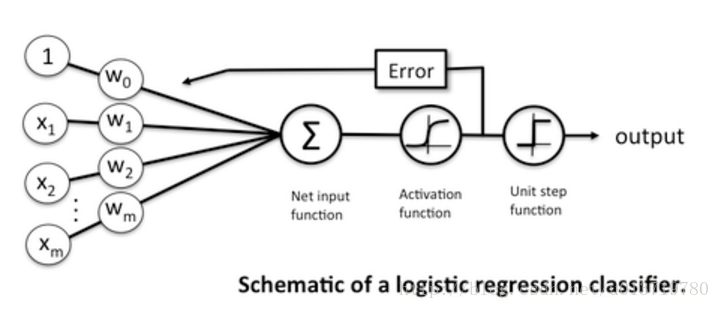

In [1]:
from IPython.display import display, Image
display(Image('logistic.png'))

In [2]:
from __future__ import print_function, division
import sys
import os
import math
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)

    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    
    return X[idx], y[idx]



# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 标准化数据集 X
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    
    # 做除法运算时请永远记住分母不能等于0的情形
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0) 
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    
    return X_std


# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    if shuffle:
        X, y = shuffle_data(X, y, seed)
        
    n_train_samples = int(X.shape[0] * (1-test_size))
    x_train, x_test = X[:n_train_samples], X[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]
    
    return x_train, x_test, y_train, y_test


# 将一个向量转换成对角阵，其中对角阵上的元素就是向量中元素
def vec2diagonal(vec):
    vec_length = len(vec)
    diagonal = np.zeros((vec_length, vec_length))
    for i in range(vec_length):
        diagonal[i][i] = vec[i]
    return diagonal


def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred)/len(y)


class Sigmoid:
    
    def function(self, x):
        return 1/(1 + np.exp(-x))
    
    def derivative(self, x):
        return self.function(x) * (1 - self.function(x))


class LogisticRegression():
    """逻辑回归分类模型. 
    Parameters:
    -----------
    learning_rate: float
        学习率.
    gradient_descent: boolean
        是否使用梯度下降方法求解参数w，如果gradient_descent=True, 则用gradient_descent学习参数w; 
        否则用广义最小二乘法直接求解参数w.
    """
    def __init__(self, learning_rate=.1, gradient_descent=True):
        self.w = None
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.sigmoid = Sigmoid()


    def fit(self, X, y, n_iterations=4000):
        # 在第一列添加偏置列，全部初始化为1
        X = np.insert(X, 0, 1, axis=1)
        X = X.reshape(X.shape[0], -1)
        y = y.reshape(y.shape[0], -1)

        n_samples, n_features = np.shape(X)

        # 参数初始化 [-1/n_features, 1/n_features]
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, 1))
        
        
        for i in range(n_iterations):
            # 通过初始化的参数w计算预测值
            y_pred = self.sigmoid.function(X.dot(self.w))
            # 梯度下降更新参数w.
            if self.gradient_descent:
                self.w -= self.learning_rate * X.T.dot(-(y - y_pred))
                self.w -= self.learning_rate * X.T.dot(-(y - y_pred) * 
                                 self.sigmoid.function(X.dot(self.w)) * 
                                (1 - self.sigmoid.function(X.dot(self.w))))
            # 最小二乘法求解
            else:
                # Make a diagonal matrix of the sigmoid gradient column vector
                diag_gradient = vec2diagonal(self.sigmoid.derivative(X.dot(self.w)))
                # Batch opt:
                self.w = np.linalg.pinv(X.T.dot(diag_gradient).dot(X)).dot(X.T).dot(diag_gradient.dot(X).dot(self.w) + y - y_pred)
                
    def predict(self, X):
        # 训练模型的时候我们添加了偏置，预测的时候也需要添加偏置
        X = X.reshape(X.shape[0], -1)
        X = np.insert(X, 0, 1, axis=1)
        # 预测
        y_pred = np.round(self.sigmoid.function(X.dot(self.w))).astype(int)
        return y_pred
        

def main():
    # Load dataset
    data = datasets.load_iris()
    X = normalize(data.data[data.target != 0])
    y = data.target[data.target != 0]
    y[y == 1] = 0
    y[y == 2] = 1

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, seed=1)
    
    clf = LogisticRegression(gradient_descent=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accu = accuracy(y_test, y_pred)
    print ("Accuracy:", accu)
    
if __name__ == "__main__":
    main()

Accuracy: 0.939393939394
